In [3]:
#all imports
# import local modules.

from sklearn.neighbors import KNeighborsClassifier
from model.k_nearest_neigbors import KNearestNeighbors
from utils import data_loader, pre_training_analysis_tools 
from sklearn import svm
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from skopt.space import Real, Categorical, Integer






>> initialising model...
>> training model...
>> describing model...
KNeighborsClassifier()
>> predicting test data...
>> assessing prediction performance...
ESS: 51
RSS: 6
TSS: 72
R-squared: 0.92
correlation: 0.36
0.6898148148148148
0.5
              precision    recall  f1-score   support

         1.0       0.52      0.61      0.56        18
         2.0       0.52      0.58      0.55        24
         3.0       0.33      0.17      0.22        12

    accuracy                           0.50        54
   macro avg       0.46      0.45      0.45        54
weighted avg       0.48      0.50      0.48        54



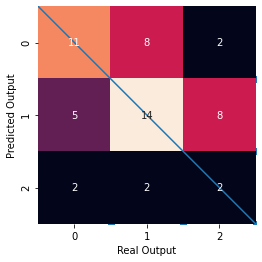

In [4]:
data = data_loader.load_real_dataset(remove_multicollinearity=False, top20_mi=True)

data_x = data['train_x']
data_y = data['train_y']
test_x = data['test_x']
test_y = data['test_y']

# determine which model we are using.

# mo = svm.SVC(C=8,gamma=6,kernel='rbf')
mo = KNeighborsClassifier()

model = KNearestNeighbors(data, normalize=True, model = mo)
#model.hyperparameter_tuning()
model.train()
model.describe()
model.test()



In [ ]:
model = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=5, random_state=1)

# Defines the parameter search space
param_grid = {
                'n_neighbors': range(1,3),  # integer valued parameter
                'weights': ['uniform', 'distance'],  # categorical parameter
                'metric': ['euclidean', 'manhattan', 'minkowski'], # categorical parameter
            }

# Set all the variables for the grid search cross validation 
search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='accuracy')

# perform the search - i.e. it fits the model on the training data set for the different hyper-parameter settings
search_result = search.fit(data_x, data_y)

# Prints the results - optimal hyper-parameters and the accuracy score
print("The best parameters are %s with a score of %0.2f"
    % (search_result.best_params_, search_result.best_score_))

# Displays all of the hyper-parameters combination in descending order of accuracy score
grid_results = pd.concat([pd.DataFrame(search_result.cv_results_["params"]),pd.DataFrame(search_result.cv_results_["mean_test_score"], columns=["accuracy"])],axis=1)
grid_results.sort_values(by=['accuracy'], inplace=True, ascending=False)
print(grid_results.head)



Text(0, 0.5, 'Error Rate')

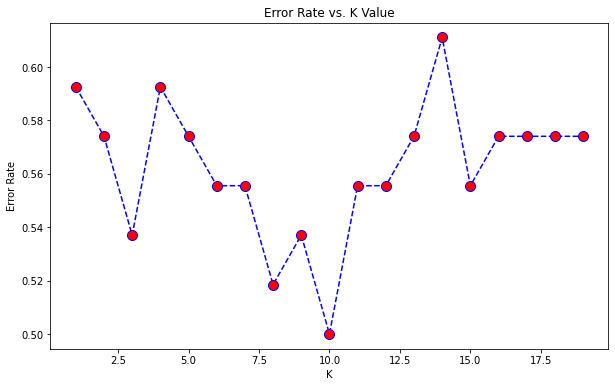

In [16]:
error_rate = []
# Might take some time
for i in range(1,20):
    
    # Set up the hyperparameters
    # Instantiate the metric learner

    # Train the metric learner
    model = KNeighborsClassifier(n_neighbors=i,weights='distance',metric='manhattan')
    model.fit(data_x,data_y)

    pred_i = model.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# want to choose k with the least error rate
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

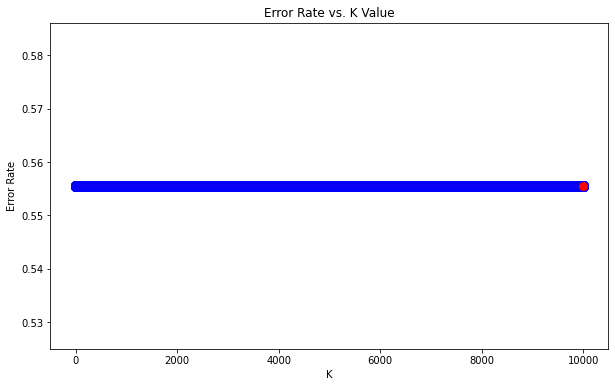

In [33]:
error_rate = []
# Might take some time
for i in range(1,10000):
    
    # Set up the hyperparameters
    # Instantiate the metric learner

    # Train the metric learner
    model = SVC(C=0.001,gamma=i,kernel='rbf')
    model.fit(data_x,data_y)

    pred_i = model.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10000),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# want to choose k with the least error rate
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Original feature shape: (216, 264)
Transformed feature shape: (216, 209)
synchronizedMethodsQty_stdev | synchronizedMethodsQty_average | 0.87
synchronizedMethodsQty_stdev: -0.025
synchronizedMethodsQty_average: -0.054
dropped: synchronizedMethodsQty_stdev
-----------------------------------------------------------------------------
synchronizedMethodsQty_max | synchronizedMethodsQty_average | 0.55
synchronizedMethodsQty_max: 0.023
synchronizedMethodsQty_average: -0.054
dropped: synchronizedMethodsQty_max
-----------------------------------------------------------------------------
parenthesizedExpsQty_sum | synchronizedMethodsQty_sum | 0.82
parenthesizedExpsQty_sum: 0.135
synchronizedMethodsQty_sum: 0.194
dropped: parenthesizedExpsQty_sum
-----------------------------------------------------------------------------
parenthesizedExpsQty_average | synchronizedMethodsQty_average | 0.54
parenthesizedExpsQty_average: -0.124
synchronizedMethodsQty_average: -0.054
dropped: synchronizedMethods

wmc_stdev | maxNestedBlocksQty_average | 0.51
wmc_stdev: -0.096
maxNestedBlocksQty_average: -0.286
dropped: wmc_stdev
-----------------------------------------------------------------------------
wmc_median | publicMethodsQty_median | 0.56
wmc_median: -0.165
publicMethodsQty_median: -0.128
dropped: publicMethodsQty_median
-----------------------------------------------------------------------------
wmc_median | maxNestedBlocksQty_average | 0.69
wmc_median: -0.165
maxNestedBlocksQty_average: -0.286
dropped: wmc_median
-----------------------------------------------------------------------------
wmc_max | parenthesizedExpsQty_max | 0.56
wmc_max: 0.141
parenthesizedExpsQty_max: 0.032
dropped: parenthesizedExpsQty_max
-----------------------------------------------------------------------------
wmc_max | publicMethodsQty_max | 0.56
wmc_max: 0.141
publicMethodsQty_max: 0.102
dropped: publicMethodsQty_max
-----------------------------------------------------------------------------
rfc_sum |

modifiers_stdev | modifiers_average | 0.83
modifiers_stdev: 0.097
modifiers_average: 0.03
dropped: modifiers_average
-----------------------------------------------------------------------------
modifiers_max | modifiers_stdev | 0.62
modifiers_max: 0.102
modifiers_stdev: 0.097
dropped: modifiers_stdev
-----------------------------------------------------------------------------
modifiers_max | modifiers_min | 0.54
modifiers_max: 0.102
modifiers_min: -0.132
dropped: modifiers_max
-----------------------------------------------------------------------------
lcc_sum | privateMethodsQty_sum | 0.92
lcc_sum: -0.283
privateMethodsQty_sum: 0.288
dropped: lcc_sum
-----------------------------------------------------------------------------
lcc_stdev | lcc_average | 0.81
lcc_stdev: 0.254
lcc_average: -0.181
dropped: lcc_average
-----------------------------------------------------------------------------
lcc_min | lcc_stdev | 0.69
lcc_min: -0.191
lcc_stdev: 0.254
dropped: lcc_min
---------------

loopQty_average | maxNestedBlocksQty_average | 0.59
loopQty_average: -0.157
maxNestedBlocksQty_average: -0.286
dropped: loopQty_average
-----------------------------------------------------------------------------
loopQty_stdev | mathOperationsQty_stdev | 0.65
loopQty_stdev: -0.129
mathOperationsQty_stdev: -0.146
dropped: loopQty_stdev
-----------------------------------------------------------------------------
loopQty_median | maxNestedBlocksQty_average | 0.55
loopQty_median: -0.081
maxNestedBlocksQty_average: -0.286
dropped: loopQty_median
-----------------------------------------------------------------------------
defaultFieldsQty_sum | privateMethodsQty_sum | 0.7
defaultFieldsQty_sum: 0.191
privateMethodsQty_sum: 0.288
dropped: defaultFieldsQty_sum
-----------------------------------------------------------------------------
defaultFieldsQty_stdev | defaultFieldsQty_average | 0.9
defaultFieldsQty_stdev: -0.072
defaultFieldsQty_average: -0.123
dropped: defaultFieldsQty_stdev
-----

innerClassesQty_max | privateMethodsQty_sum | 0.76
innerClassesQty_max: 0.213
privateMethodsQty_sum: 0.288
dropped: innerClassesQty_max
-----------------------------------------------------------------------------
comparisonsQty_sum | privateMethodsQty_sum | 0.6
comparisonsQty_sum: 0.07
privateMethodsQty_sum: 0.288
dropped: comparisonsQty_sum
-----------------------------------------------------------------------------
comparisonsQty_average | maxNestedBlocksQty_average | 0.67
comparisonsQty_average: -0.105
maxNestedBlocksQty_average: -0.286
dropped: comparisonsQty_average
-----------------------------------------------------------------------------
comparisonsQty_stdev | maxNestedBlocksQty_average | 0.52
comparisonsQty_stdev: -0.074
maxNestedBlocksQty_average: -0.286
dropped: comparisonsQty_stdev
-----------------------------------------------------------------------------
comparisonsQty_median | maxNestedBlocksQty_average | 0.58
comparisonsQty_median: -0.107
maxNestedBlocksQty_averag

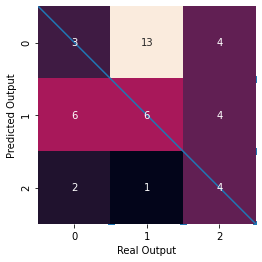

In [36]:

data = data_loader.load_real_dataset(sqaured=False, remove_multicollinearity=False, normalise=True)
output_xy = pre_training_analysis_tools.variance_threshold(data['train_x'],data['train_y'])
output_xy = pre_training_analysis_tools.remove_collinear_features(output_xy, 'maven_reuse', 0.50, 'True')
data = pre_training_analysis_tools.generate_train_test_xy(output_xy)

data_x = data['train_x']
data_y = data['train_y']
test_x = data['test_x']
test_y = data['test_y']

# determine which model we are using.

# mo = svm.SVC(C=8,gamma=6,kernel='rbf')
mo = KNeighborsClassifier()

model = KNearestNeighbors(data, model = mo)
#model.hyperparameter_tuning()
model.train()
model.describe()
model.test()




Text(0, 0.5, 'Error Rate')

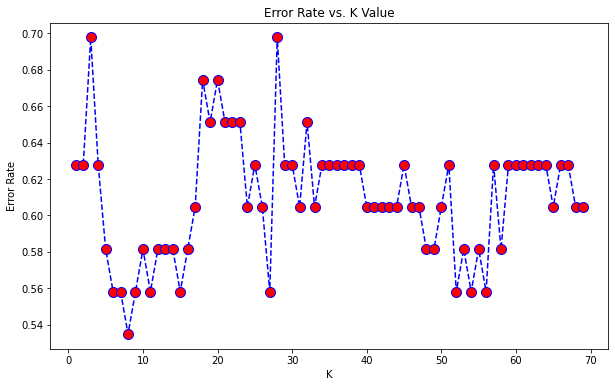

In [37]:
error_rate = []
# Might take some time
for i in range(1,70):
    
    # Set up the hyperparameters
    # Instantiate the metric learner

    # Train the metric learner
    model = KNeighborsClassifier(n_neighbors=i,weights='distance')
    model.fit(data_x,data_y)

    pred_i = model.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# want to choose k with the least error rate
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')